# dbpedia

In [ ]:
import csv
import pandas as pd
data = pd.read_csv('data/dbpedia/train_subset.csv')
sentences = data['Text']
labels = data['Class']
sentences = sentences[0:5100]
labels = labels[0:5100]
label_names = pd.read_csv('data/dbpedia/classes.txt', header=None)[0]

Data to collect:
- target prediction probability of member
- target prediction probability of non-member
- y = list where each element is 1 if member and 0 if non-member
- y_prob = list where each element is the target prediction probability

In [ ]:
member_prob = []
nonmember_prob = []
y_prob = []
y = []
for i in range(0,5100):
    if (i % 51 == 0):
          y.append(1) # member
    else:
         y.append(0) # not a member

In [ ]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in range(0,58):
    prob=0
    prompt_answer=""
    if (label_names[labels[51*i]-1] == "Company"):
            prompt_answer=" Company"
    elif (label_names[labels[51*i]-1] == "EducationalInstitution"):
        prompt_answer=" School"
    elif (label_names[labels[51*i]-1] == "Artist"):
        prompt_answer=" Artist"
    elif (label_names[labels[51*i]-1] == "Athlete"):
        prompt_answer=" Athlete"
    elif (label_names[labels[51*i]-1] == "OfficeHolder"):
        prompt_answer=" Politician"
    elif (label_names[labels[51*i]-1] == "MeanOfTransportation"):
        prompt_answer=" Transportation"
    elif (label_names[labels[51*i]-1] == "Building"):
        prompt_answer=" Building"
    elif (label_names[labels[51*i]-1] == "NaturalPlace"):
        prompt_answer=" Nature"
    elif (label_names[labels[51*i]-1] == "Village"):
        prompt_answer=" Village"
    elif (label_names[labels[51*i]-1] == "Animal"):
        prompt_answer=" Animal"
    elif (label_names[labels[51*i]-1] == "Plant"):
        prompt_answer=" Plant"
    elif (label_names[labels[51*i]-1] == "Album"):
        prompt_answer=" Album"
    elif (label_names[labels[51*i]-1] == "Film"):
        prompt_answer=" Film"
    elif (label_names[labels[51*i]-1] == "WrittenWork"):
        prompt_answer=" Book"

    for j in range(0,51):
        prompt=f"Classify the documents based on whether they are about a Company, School, Artist, Athlete, Politician, Transportation, Building, Nature, Village, Animal, Plant, Album, Film, or Book.\n\nArticle:{sentences[51*i]} Answer:{prompt_answer}\nArticle: {sentences[(51*i)+j]} Answer:"
        completion=openai.Completion.create(
            model="babbage",
            prompt=prompt,
            max_tokens=1,
            temperature=0,
            logprobs=5
        )

        if ((label_names[labels[(51*i)+j]-1] == "Company") and (" Company" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Company"]
        elif ((label_names[labels[(51*i)+j]-1] == "EducationalInstitution") and (" School" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" School"]
        elif ((label_names[labels[(51*i)+j]-1] == "Artist") and (" Artist" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Artist"]
        elif ((label_names[labels[(51*i)+j]-1] == "Athlete") and (" Ath" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Ath"]
        elif ((label_names[labels[(51*i)+j]-1] == "OfficeHolder") and (" Polit" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Polit"]
        elif ((label_names[labels[(51*i)+j]-1] == "MeanOfTransportation") and (" Transportation" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Transportation"]
        elif ((label_names[labels[(51*i)+j]-1] == "Building") and (" Building" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Building"]
        elif ((label_names[labels[(51*i)+j]-1] == "NaturalPlace") and (" Nature" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Nature"]
        elif ((label_names[labels[(51*i)+j]-1] == "Village") and (" Village" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Village"]
        elif ((label_names[labels[(51*i)+j]-1] == "Animal") and (" Animal" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Animal"]
        elif ((label_names[labels[(51*i)+j]-1] == "Plant") and (" Plant" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Plant"]
        elif ((label_names[labels[(51*i)+j]-1] == "Album") and (" Album" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Album"]
        elif ((label_names[labels[(51*i)+j]-1] == "Film") and (" Film" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Film"]
        elif ((label_names[labels[(51*i)+j]-1] == "WrittenWork") and (" Book" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Book"]
        else:
            prob=0

        if ((((51*i)+j) % 51) == 0): # is a member
            member_prob.append(prob)
        else: # not a member
            nonmember_prob.append(prob)

        y_prob.append(prob)

        print(f"Done processing request # {(51*i)+j}...")


print("Done!")

In [ ]:
import time
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in range(58,100):
    prob=0
    prompt_answer=""
    if (label_names[labels[51*i]-1] == "Company"):
            prompt_answer=" Company"
    elif (label_names[labels[51*i]-1] == "EducationalInstitution"):
        prompt_answer=" School"
    elif (label_names[labels[51*i]-1] == "Artist"):
        prompt_answer=" Artist"
    elif (label_names[labels[51*i]-1] == "Athlete"):
        prompt_answer=" Athlete"
    elif (label_names[labels[51*i]-1] == "OfficeHolder"):
        prompt_answer=" Politician"
    elif (label_names[labels[51*i]-1] == "MeanOfTransportation"):
        prompt_answer=" Transportation"
    elif (label_names[labels[51*i]-1] == "Building"):
        prompt_answer=" Building"
    elif (label_names[labels[51*i]-1] == "NaturalPlace"):
        prompt_answer=" Nature"
    elif (label_names[labels[51*i]-1] == "Village"):
        prompt_answer=" Village"
    elif (label_names[labels[51*i]-1] == "Animal"):
        prompt_answer=" Animal"
    elif (label_names[labels[51*i]-1] == "Plant"):
        prompt_answer=" Plant"
    elif (label_names[labels[51*i]-1] == "Album"):
        prompt_answer=" Album"
    elif (label_names[labels[51*i]-1] == "Film"):
        prompt_answer=" Film"
    elif (label_names[labels[51*i]-1] == "WrittenWork"):
        prompt_answer=" Book"

    for j in range(0,51):
        prompt=f"Classify the documents based on whether they are about a Company, School, Artist, Athlete, Politician, Transportation, Building, Nature, Village, Animal, Plant, Album, Film, or Book.\n\nArticle:{sentences[51*i]} Answer:{prompt_answer}\nArticle: {sentences[(51*i)+j]} Answer:"
        completion=openai.Completion.create(
            model="babbage",
            prompt=prompt,
            max_tokens=1,
            temperature=0,
            logprobs=5
        )

        if ((label_names[labels[(51*i)+j]-1] == "Company") and (" Company" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Company"]
        elif ((label_names[labels[(51*i)+j]-1] == "EducationalInstitution") and (" School" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" School"]
        elif ((label_names[labels[(51*i)+j]-1] == "Artist") and (" Artist" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Artist"]
        elif ((label_names[labels[(51*i)+j]-1] == "Athlete") and (" Ath" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Ath"]
        elif ((label_names[labels[(51*i)+j]-1] == "OfficeHolder") and (" Polit" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Polit"]
        elif ((label_names[labels[(51*i)+j]-1] == "MeanOfTransportation") and (" Transportation" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Transportation"]
        elif ((label_names[labels[(51*i)+j]-1] == "Building") and (" Building" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Building"]
        elif ((label_names[labels[(51*i)+j]-1] == "NaturalPlace") and (" Nature" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Nature"]
        elif ((label_names[labels[(51*i)+j]-1] == "Village") and (" Village" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Village"]
        elif ((label_names[labels[(51*i)+j]-1] == "Animal") and (" Animal" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Animal"]
        elif ((label_names[labels[(51*i)+j]-1] == "Plant") and (" Plant" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Plant"]
        elif ((label_names[labels[(51*i)+j]-1] == "Album") and (" Album" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Album"]
        elif ((label_names[labels[(51*i)+j]-1] == "Film") and (" Film" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Film"]
        elif ((label_names[labels[(51*i)+j]-1] == "WrittenWork") and (" Book" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Book"]
        else:
            prob=0

        if ((((51*i)+j) % 51) == 0): # is a member
            member_prob.append(prob)
        else: # not a member
            nonmember_prob.append(prob)

        y_prob.append(prob)

        print(f"Done processing request # {(51*i)+j}...")


print("Done!")

In [ ]:
import json

# Save the lists to JSON files
with open('dbpedia_member_prob.json', 'w') as file:
    json.dump(member_prob, file)

with open('dbpedia_nonmember_prob.json', 'w') as file:
    json.dump(nonmember_prob, file)

with open('dbpedia_y_prob.json', 'w') as file:
    json.dump(y_prob, file)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(member_prob, bins=10, density=True, alpha=0.5, color='blue', label='Member')
plt.hist(nonmember_prob, bins=10, density=True, alpha=0.5, color='orange', label='Non member')

# Add labels and legend
plt.xlabel('Target Prediction Probability')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
plot_roc_curve(y, y_prob)
print(f'dbpedia AUC-ROC score: {roc_auc_score(y, y_prob)}')

# sst2

In [4]:
import random
with open("data/sst2/stsa.binary.train", "r") as f:
        train_lines = f.readlines()
random.shuffle(train_lines)
labels = []
sentences = []
for line in train_lines:
    labels.append(int(line[0]))
    sentences.append(line[2:].strip())

In [5]:
member_prob = []
nonmember_prob = []
y_prob = []
y = []
for i in range(0,5100):
    if (i % 51 == 0):
          y.append(1) # member
    else:
         y.append(0) # not a member

In [6]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in range(0,100):
    if (labels[51*i] == 0):
        prompt_answer="Negative"
    elif (labels[51*i] == 1):
        prompt_answer="Positive"

    for j in range(0,51):
        prob=0
        prompt=f"Review: {sentences[51*i]} Sentiment: {prompt_answer} Review: {sentences[(51*i)+j]} Sentiment:"
        completion=openai.Completion.create(
            model="babbage",
            prompt=prompt,
            max_tokens=1,
            temperature=0,
            logprobs=5
        )

        if ((labels[(51*i)+j] == 0) and (" Negative" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Negative"]
        elif ((labels[(51*i)+j] == 1) and (" Positive" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Positive"]
        else:
            prob=0

        if ((((51*i)+j) % 51) == 0): # is a member
            member_prob.append(prob)
        else: # not a member
            nonmember_prob.append(prob)

        y_prob.append(prob)


print("Done!")

Done!


In [8]:
import json

# Save the lists to JSON files
with open('sst2_member_prob.json', 'w') as file:
    json.dump(member_prob, file)

with open('sst2_nonmember_prob.json', 'w') as file:
    json.dump(nonmember_prob, file)

with open('sst2_y_prob.json', 'w') as file:
    json.dump(y_prob, file)

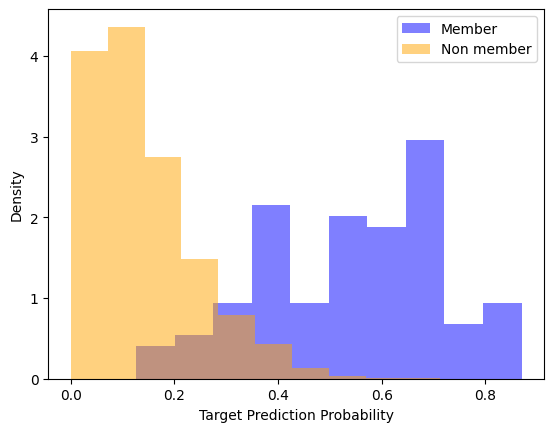

In [9]:
import matplotlib.pyplot as plt
plt.hist(member_prob, bins=10, density=True, alpha=0.5, color='blue', label='Member')
plt.hist(nonmember_prob, bins=10, density=True, alpha=0.5, color='orange', label='Non member')

# Add labels and legend
plt.xlabel('Target Prediction Probability')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

sst2 AUC-ROC score: 0.9725539999999999


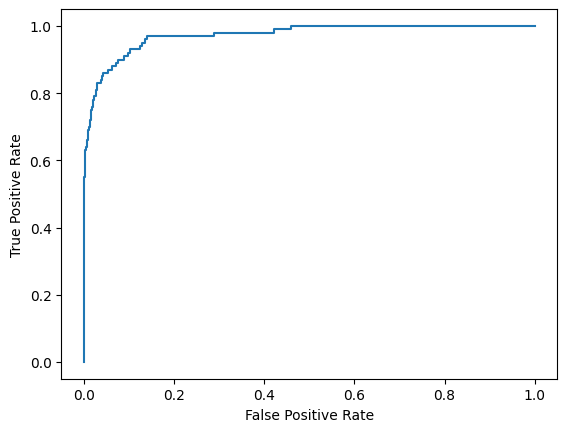

In [11]:
plot_roc_curve(y, y_prob)
print(f'sst2 AUC-ROC score: {roc_auc_score(y, y_prob)}')

# agnews

In [15]:
import pandas as pd

train_data = pd.read_csv("data/agnews/train.csv")
train_data = train_data.sample(frac=1, random_state=1)
train_data.reset_index(drop=True, inplace=True)
sentences = train_data['Title'] + ". " + train_data['Description']
labels = list(train_data['Class Index'])
labels = [l - 1 for l in labels] # make them 0, 1, 2, 3 instead of 1, 2, 3, 4

In [17]:
member_prob = []
nonmember_prob = []
y_prob = []
y = []
for i in range(0,5100):
    if (i % 51 == 0):
          y.append(1) # member
    else:
         y.append(0) # not a member

In [18]:
import random
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in range(0,100):
    if (labels[51*i] == 0):
        prompt_answer="World"
    elif (labels[51*i] == 1):
        prompt_answer="Sports"
    elif (labels[51*i] == 2):
        prompt_answer="Business"
    elif (labels[51*i] == 3):
        prompt_answer=random.choice(["Technology", "Science"])

    for j in range(0,51):
        prob=0
        prompt=f"Classify the news articles into the categories of World, Sports, Business, and Technology.\n\nArticle: {sentences[51*i]} Answer: {prompt_answer} Article: {sentences[(51*i)+j]} Answer:"
        completion=openai.Completion.create(
            model="babbage",
            prompt=prompt,
            max_tokens=1,
            temperature=0,
            logprobs=5
        )

        if ((labels[(51*i)+j] == 0) and (" World" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" World"]
        elif ((labels[(51*i)+j] == 1) and (" Sports" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Sports"]
        elif ((labels[(51*i)+j] == 2) and (" Business" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Business"]
        elif ((labels[(51*i)+j] == 3) and (" Technology" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Technology"]
        elif ((labels[(51*i)+j] == 3) and (" Science" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Science"]
        else:
            prob=0

        if ((((51*i)+j) % 51) == 0): # is a member
            member_prob.append(prob)
        else: # not a member
            nonmember_prob.append(prob)

        y_prob.append(prob)


print("Done!")

Done!


In [20]:
import json

# Save the lists to JSON files
with open('agnews_member_prob.json', 'w') as file:
    json.dump(member_prob, file)

with open('agnews_nonmember_prob.json', 'w') as file:
    json.dump(nonmember_prob, file)

with open('agnews_y_prob.json', 'w') as file:
    json.dump(y_prob, file)

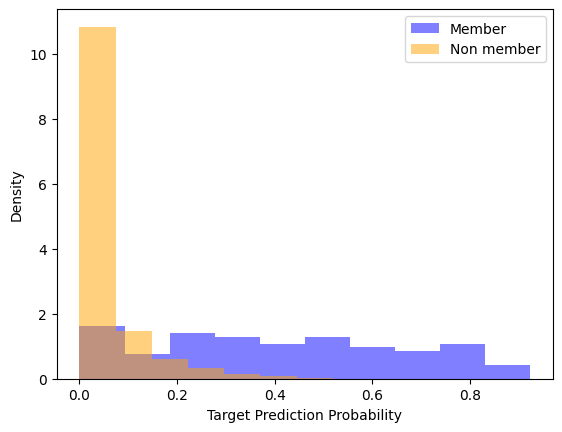

In [21]:
import matplotlib.pyplot as plt
plt.hist(member_prob, bins=10, density=True, alpha=0.5, color='blue', label='Member')
plt.hist(nonmember_prob, bins=10, density=True, alpha=0.5, color='orange', label='Non member')

# Add labels and legend
plt.xlabel('Target Prediction Probability')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

agnews AUC-ROC score: 0.873316


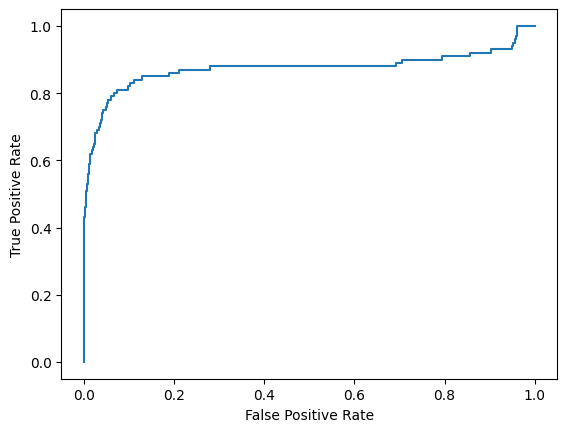

In [23]:
plot_roc_curve(y, y_prob)
print(f'agnews AUC-ROC score: {roc_auc_score(y, y_prob)}')

# trec

In [25]:
import random

sentences = []
labels = []
with open(f'data/trec/train.txt', 'r') as f:
    train_data = f.readlines()
    random.shuffle(train_data)
    for line in train_data:
        train_label = line.split(' ')[0].split(':')[0]
        train_sentence = ' '.join(line.split(' ')[1:]).strip()
        # basic cleaning
        train_sentence = train_sentence.replace(" 's", "'s").replace('`` ', '"').replace(" ''",'"').replace(' ?','?').replace(' ,',',')
        labels.append(train_label)
        sentences.append(train_sentence)

In [27]:
member_prob = []
nonmember_prob = []
y_prob = []
y = []
for i in range(0,5100):
    if (i % 51 == 0):
          y.append(1) # member
    else:
         y.append(0) # not a member

In [29]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in range(0,100):
    if (labels[51*i] == "NUM"):
        prompt_answer="Number"
    elif (labels[51*i] == "LOC"):
        prompt_answer="Location"
    elif (labels[51*i] == "HUM"):
        prompt_answer="Person"
    elif (labels[51*i] == "DESC"):
        prompt_answer="Description"
    elif (labels[51*i] == "ENTY"):
        prompt_answer="Entity"
    elif (labels[51*i] == "ABBR"):
        prompt_answer="Abbreviation"

    for j in range(0,51):
        prob=0
        prompt=f"Classify the questions based on whether their answer type is a Number, Location, Person, Description, Entity, or Abbreviation.\n\nQuestion: {sentences[51*i]} Answer Type: {prompt_answer} Question: {sentences[(51*i)+j]} Answer Type:"
        completion=openai.Completion.create(
            model="babbage",
            prompt=prompt,
            max_tokens=1,
            temperature=0,
            logprobs=5
        )

        if ((labels[(51*i)+j] == "NUM") and (" Number" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Number"]
        elif ((labels[(51*i)+j] == "LOC") and (" Location" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Location"]
        elif ((labels[(51*i)+j] == "HUM") and (" Person" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Person"]
        elif ((labels[(51*i)+j] == "DESC") and (" Description" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Description"]
        elif ((labels[(51*i)+j] == "ENTY") and (" Entity" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Entity"]
        elif ((labels[(51*i)+j] == "ABBR") and (" Ab" in completion.choices[0].logprobs.top_logprobs[0])):
            prob=10**completion.choices[0].logprobs.top_logprobs[0][" Ab"]
        else:
            prob=0

        if ((((51*i)+j) % 51) == 0): # is a member
            member_prob.append(prob)
        else: # not a member
            nonmember_prob.append(prob)

        y_prob.append(prob)


print("Done!")

Done!


In [30]:
import json

# Save the lists to JSON files
with open('trec_member_prob.json', 'w') as file:
    json.dump(member_prob, file)

with open('trec_nonmember_prob.json', 'w') as file:
    json.dump(nonmember_prob, file)

with open('trec_y_prob.json', 'w') as file:
    json.dump(y_prob, file)

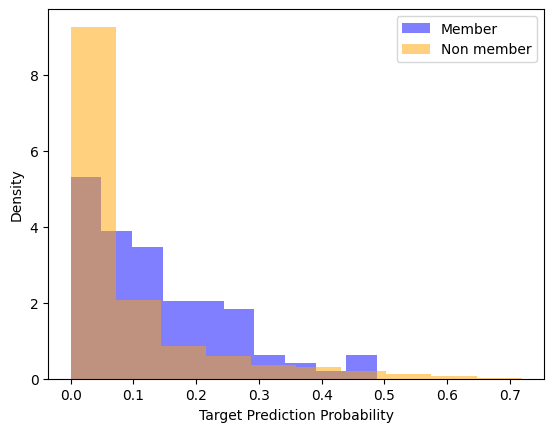

In [32]:
import matplotlib.pyplot as plt
plt.hist(member_prob, bins=10, density=True, alpha=0.5, color='blue', label='Member')
plt.hist(nonmember_prob, bins=10, density=True, alpha=0.5, color='orange', label='Non member')

# Add labels and legend
plt.xlabel('Target Prediction Probability')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

agnews AUC-ROC score: 0.702224


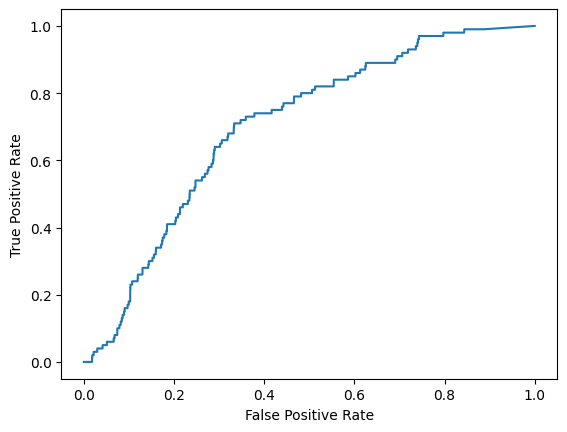

In [34]:
plot_roc_curve(y, y_prob)
print(f'agnews AUC-ROC score: {roc_auc_score(y, y_prob)}')